# Práctica 1: Regresión lineal

#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

### Imports

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from pandas.io.parsers import read_csv

### Carga de los datos

In [45]:
def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

## Parte 1: Regresión lineal sobre una variable

## Solución iterativa

In [46]:
# Hipótesis h0(x)
def fun_hipotesis(x, thetas):
    return thetas[0] + thetas[1] * x

In [47]:
# Calcula el descenso de gradiente
def descenso_gradiente(X, Y, m, alpha, num_iteraciones=1500):
    
    thetas = [0, 0]

    # Iteraciones para minimizar el coste
    for _ in range(num_iteraciones):
        
        sum_0 = sum_1 = 0
        
        for i in range(m):            
            sum_0 += fun_hipotesis(X[i], thetas) - Y[i]
            sum_1 += (fun_hipotesis(X[i], thetas) - Y[i]) * X[i]
        
        # Actualizamos valores de theta0 y theta1        
        thetas[0] = thetas[0] - (alpha / m) * sum_0
        thetas[1] = thetas[1] - (alpha / m) * sum_1
    
    # Dibuja la gráfica
    plt.plot(X, Y, "x",c='red')
    
    min_x = min(X)
    max_x = max (X)
    
    min_y = thetas[0] + thetas[1] * min_x
    max_y = thetas[0] + thetas[1] * max_x
    
    plt.plot([min_x, max_x], [min_y, max_y])
    
    #plt.savefig("resultado.pdf")
    #plt.figure()
    
    return thetas

In [48]:
# Función de coste total
def fun_coste(X, Y, m, thetas):
    sumatorio = 0
    for i in range(len(X)):
        sumatorio += (fun_hipotesis(X[i], thetas) - Y[i])**2
    return (sumatorio / (2*m))

In [49]:
# Genera las rejillas para las gráficas
def make_data(X, Y):
    
    step = 0.1
    Theta0 = np.arange(-10, 10, step)
    Theta1 = np.arange(-1, 4, step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)

    Coste = np.empty_like(Theta0)

    for i in range(len(Theta0)):
        for j in range(len(Theta0[i])):
            Coste[i][j] = fun_coste(X, Y, m, [Theta0[i, j], Theta1[i, j]])
            
    return Theta0, Theta1, Coste

In [50]:
# Dibuja la función de coste 3D
def dibuja_coste(Theta0, Theta1, Coste):
    
    # Pinta la gráfica
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(-Theta1, Theta0, Coste, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    # Customize the z axis
    #ax.set_zlim(100,  60000)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

In [51]:
# Dibuja la función de coste con una gráfica de contorno
def dibuja_contorno(X, Y, Coste):
    plt.contour(Theta0, Theta1, Coste, np.logspace(-2, 3, 20), colors='blue')

### Observando resultados

In [52]:
# Carga de los datos
datos = carga_csv('ex1data1.csv')

alpha = 0.01

X = datos[:, 0]
Y = datos [:, 1]

# Número filas y columnas
m = (len(X))
n = 2

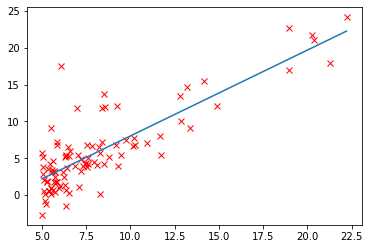

In [53]:
# Aplicamos descenso de gradiente
thetas = descenso_gradiente(X, Y, m, alpha, 1500)

In [54]:
# Observamos los valores theta0, theta1 y su coste
print("thetas[0]: " + str(thetas[0]))
print("thetas[1]: " + str(thetas[1]))
coste = fun_coste(X, Y, m, thetas)
print("Coste: ", coste)

thetas[0]: -3.63029143940436
thetas[1]: 1.166362350335582
Coste:  4.483388256587727


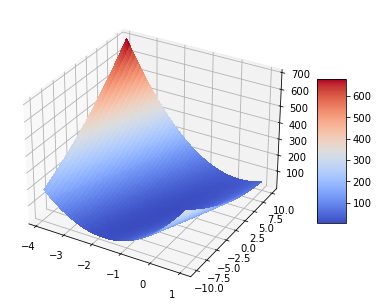

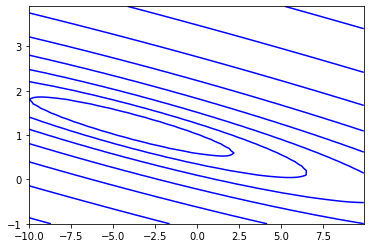

In [55]:
# Dibujamos la función de coste con un gráfico 3D y otro de rejilla
Theta0, Theta1, Coste = make_data(X, Y)

dibuja_coste(Theta0, Theta1, Coste)
dibuja_contorno(Theta0, Theta1, Coste)

## Solución vectorizada

In [46]:
X = datos[:, :-1]
Y = datos[:, -1]

m = np.shape(X)[0]
n = np.shape(X)[1]

X = np.hstack([np.ones([m,1]), X])

alpha = 0.01
Thetas, costes = descenso_gradiente(X,Y,alpha)



[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [ ]:
def costeVec(m,X,Y):
    sumatorio = 0
    for i in range(m):
        sumatorio += (hipotesis(X[i])-Y[i])**2
    return sumatorio
     

## parte 2